# Práctica 6 - PCA

- Martínez Ostoa Néstor Iván 
- Visualización de la Información- 0605
- Ciencia de Datos, IIMAS, UNAM

In [252]:
import pandas as pd 
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [253]:
iris_df = pd.read_csv('iris.csv')

In [254]:
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1. 2D Scatter Plots

### Setosa

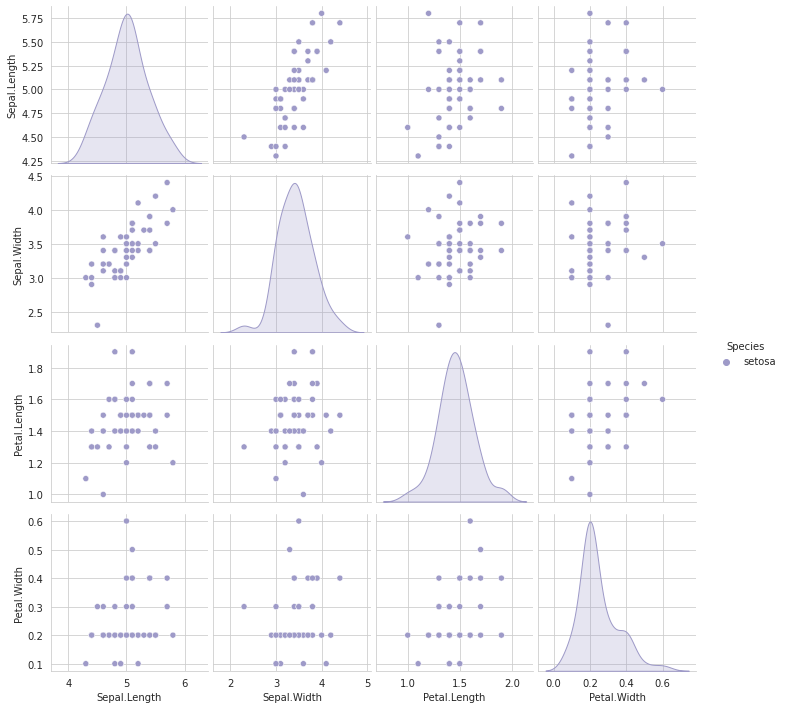

In [255]:
sns.set_style("whitegrid")
df = iris_df[iris_df.Species=='setosa']
sns.pairplot(df, hue="Species", palette='Purples')
plt.show()

- Podemos observar que las variables con mayor correlación son ```Sepal.Length``` y ```Sepal.Width```
- Mientras que las variables con menor correlación son: 
    - ```Sepal.Length``` y ```Petal.Width```
    - ```Sepal.Width```  y ```Petal.Width```

### Virginica

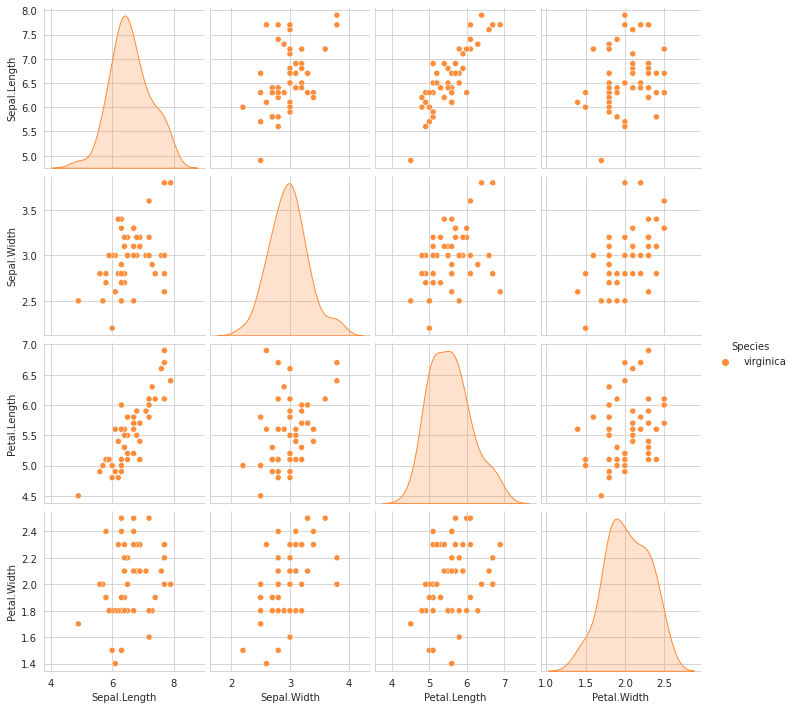

In [256]:
sns.set_style("whitegrid")
df = iris_df[iris_df.Species=='virginica']
sns.pairplot(df, hue="Species", palette='Oranges')
plt.show()

- Podemos observar que las variables con mayor correlación son:
    - ```Sepal.Length``` y ```Petal.Length```
- Mientras que las variables con menor correlación son: 
    - ```Petal.Width``` y ```Sepal.Width```
    - ```Petal.Width```  y ```Sepal.Length```

### Versicolor

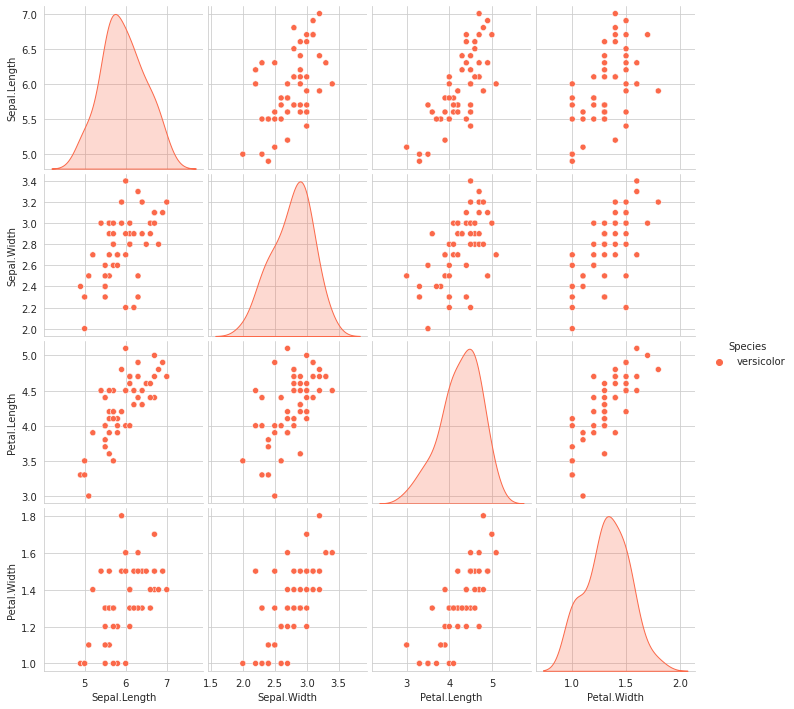

In [257]:
sns.set_style("whitegrid")
df = iris_df[iris_df.Species=='versicolor']
sns.pairplot(df, hue="Species", palette='Reds')
plt.show()

- Podemos observar que las variables con mayor correlación son:
    - ```Petal.Width``` y ```Petal.Length```
    - ```Petal.Width``` y ```Sepal.Width```
    - ```Petal.Length``` y ```Sepal.Length```
- Mientras que las variables con menor correlación son: 
    - ```Petal.Width```  y ```Sepal.Length```

### Resumen

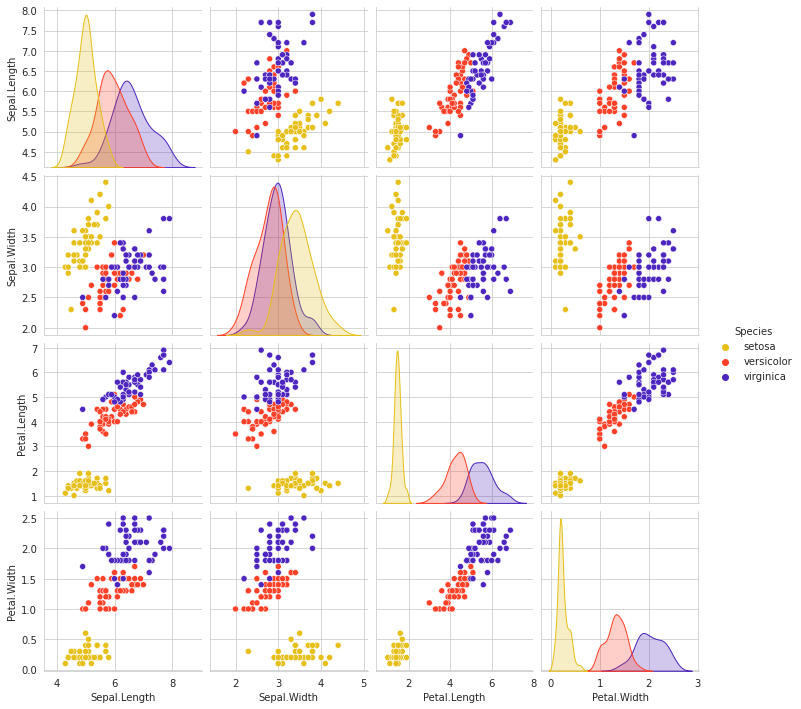

In [258]:
sns.set_style("whitegrid")
sns.pairplot(iris_df, hue="Species", palette='CMRmap_r')
plt.show()

Finalmente, podemos observar que las variables menos correlacionadas son: 
- ```Sepal.Width``` y ```Petal.Length```
- ```Sepal.Width``` y ```Petal.Width```

## 2. 3D Scatter Plot con las variables menos correlacionadas

- ```Sepal.Width``` y ```Petal.Length```
- ```Sepal.Width``` y ```Petal.Width```

In [259]:
fig = px.scatter_3d(
    iris_df, x='Sepal.Length', y='Petal.Length', z='Sepal.Width',
    color='Species', symbol='Species'
)
fig = fig.update_traces(
    marker_size=2.5
)
fig = fig.update_layout(
    title=dict(
        text="Variables menos correlacionadas", xref='container', x=0.5,
        yref='container', y=0.88, font=dict(family='Arial', size=20)
    ), 
    legend=dict(
        font=dict(size=18), title=dict(font=dict(size=18)), 
        itemsizing='constant',
    )
)
fig.show()

## 3. Histogramas para cada característica

In [260]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

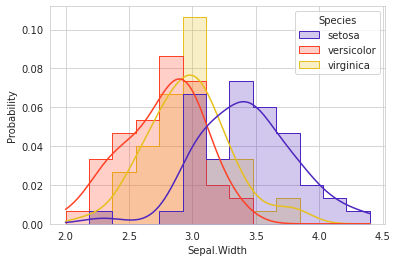

In [261]:
sns.histplot(
    iris_df, x='Sepal.Width', hue='Species', element='step', stat='probability',
    kde='True', palette='CMRmap'
)
plt.show()

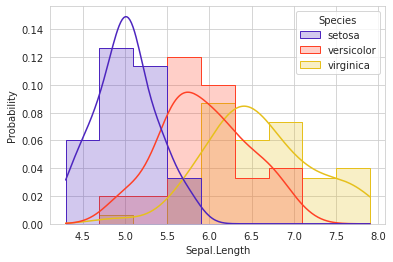

In [262]:
sns.histplot(
    iris_df, x='Sepal.Length', hue='Species', element='step', stat='probability',
    kde='True', palette='CMRmap'
)
plt.show()

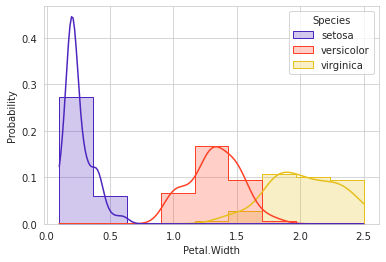

In [263]:
sns.histplot(
    iris_df, x='Petal.Width', hue='Species', element='step', stat='probability',
    kde='True', palette='CMRmap'
)
plt.show()

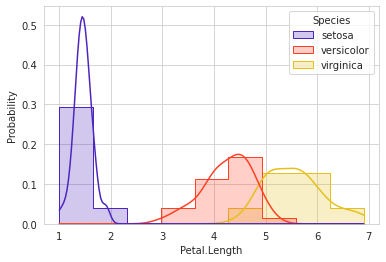

In [264]:
sns.histplot(
    iris_df, x='Petal.Length', hue='Species', element='step', stat='probability',
    kde='True', palette='CMRmap'
)
plt.show()

## 4. Procesa cada variable para que su distribución tenga media cero y varianza uno

$$Z_i = \frac{X_i - \bar{X}}{S}$$

In [316]:
df = iris_df.copy()
df = df.iloc[:, :-1]
df = df.transform(lambda x: (x - np.mean(x))/np.std(x))
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [317]:
df.describe().iloc[1:3,:]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00


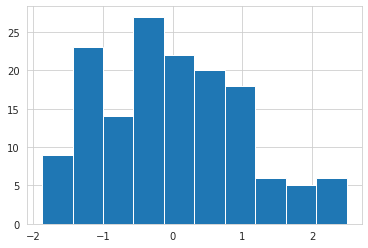

In [308]:
plt.hist(df['Sepal.Length'])
plt.show()

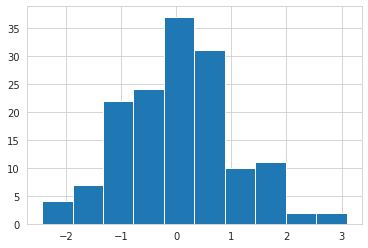

In [311]:
plt.hist(df['Sepal.Width'])
plt.show()

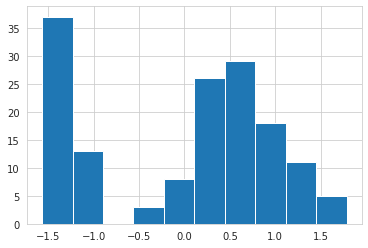

In [313]:
plt.hist(df['Petal.Length'])
plt.show()

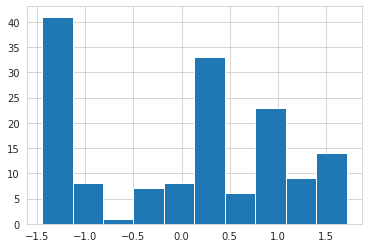

In [312]:
plt.hist(df['Petal.Width'])
plt.show()

## 5. Matriz de covarianzas

In [318]:
cov_df = df.transform(lambda x: x - np.mean(x))
cov_matrix = []
for a in cov_df.columns:
    row = []
    for b in cov_df.columns:
        X = cov_df[a]
        Y = cov_df[b]
        row.append(np.round(np.sum(X*Y)/(cov_df.shape[0]-1), 6))
    cov_matrix.append(row)
cov_matrix = np.array(cov_matrix)
print(cov_matrix)

[[ 1.006711 -0.118359  0.877604  0.823431]
 [-0.118359  1.006711 -0.431316 -0.368583]
 [ 0.877604 -0.431316  1.006711  0.969328]
 [ 0.823431 -0.368583  0.969328  1.006711]]


In [319]:
df.cov()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.006711,-0.118359,0.877604,0.823431
Sepal.Width,-0.118359,1.006711,-0.431316,-0.368583
Petal.Length,0.877604,-0.431316,1.006711,0.969328
Petal.Width,0.823431,-0.368583,0.969328,1.006711


## 6. Análisis de componentes principales parte 1

### Eigenvectores y eigenvalores de la matriz de covarianza calculada

In [320]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
eig_values, eig_vectors

(array([2.93808495, 0.92016439, 0.14774134, 0.02085332]),
 array([[ 0.52106583, -0.37741768, -0.7195674 ,  0.26128348],
        [-0.26934754, -0.9232956 ,  0.24438202, -0.12350934],
        [ 0.58041307, -0.02449119,  0.14212914, -0.80144879],
        [ 0.5648566 , -0.06694253,  0.63427084,  0.5235993 ]]))

In [271]:
print(f'Eigenvalores: {eig_values}')

Eigenvalores: [2.93808495 0.92016439 0.14774134 0.02085332]


### ¿Cómo podrías verificar que los eigenvectores obtenidos son una base ortonormal the $\mathbf{R}^4$?
__Respuesta__:
- Podríamos tomar el *span* de cada eigenvector, aplicar una transformación lineal y verificar que el *span* de estos vectores siga siendo el mismo previo a la transformación

### Organiza de manera descendiente los eigenvalores (y sus eigenvectores)

In [322]:
for idx, val in enumerate(eig_values):
    print(f'Índice: {idx} Eigenvalor: {val} -> Eigenvector: {eig_vectors[:, idx]}')

Índice: 0 Eigenvalor: 2.938084945712742 -> Eigenvector: [ 0.52106583 -0.26934754  0.58041307  0.5648566 ]
Índice: 1 Eigenvalor: 0.9201643931489087 -> Eigenvector: [-0.37741768 -0.9232956  -0.02449119 -0.06694253]
Índice: 2 Eigenvalor: 0.14774134184243348 -> Eigenvector: [-0.7195674   0.24438202  0.14212914  0.63427084]
Índice: 3 Eigenvalor: 0.020853319295915787 -> Eigenvector: [ 0.26128348 -0.12350934 -0.80144879  0.5235993 ]


### Consulta cómo se relacionan los eigenvalores con el "porcentaje de variabilidad explicada" por cada componente principal

__Respuesta__:
PCA es un algoritmo que se encarga de cambiar la base del espacio multidimensional (en este caso, 4 dimensiones). El cambio de base implica que los ejes (aunque no podamos visualizar más allá de 3) van a rotarse, cada eje rotado se le conoce como componente principal. Lo que hace PCA al final del día es generar estas componentes principales que están ordenadas por porcentaje de variabilidad, es decir, la primer componente principal será la que explique la mayor variabilidad de los datos y así sucesivamente hasta la última componente (una por cada dimensión de los datos). Ahora, con relación a los eigenvalores y las componentes principales, 

In [273]:
(eig_values[0] + eig_values[1]) / np.sum(eig_values)

0.9581323087911156

## 7. Análisis de Componentes Principales parte 2 

### Construya la matriz $W\in \mathbf{R}^{4\times 2}$ con los dos eigenvectores que corresponden a los mayores eigenvalores. 

In [327]:
eg1 = eig_vectors[:, 0].reshape(4,1)
eg2 = eig_vectors[:, 1].reshape(4,1)
W = np.concatenate((eg1, eg2), axis=1)
W, W.shape

(array([[ 0.52106583, -0.37741768],
        [-0.26934754, -0.9232956 ],
        [ 0.58041307, -0.02449119],
        [ 0.5648566 , -0.06694253]]),
 (4, 2))

### ¿Por qué se usan en este caso solo 2 componentes principales?

__Respuesta__:
- Porque son las que explican la mayor variabilidad de los datos, es decir, en estas dos se concentra el mayor porcentaje de variablidad de los datos. Si dos dimensiones tuvieran una relación lineal alta, podríamos quitar una de las dos porque con una, puedo encontrar los datos de la otra. Yendo un poco al álgebra lineal, si dos dimensiones tienen una relación lineal alta, significaría que los vectores base de estas dos dimensiones serían prácticamente idénticos, lo que significaría que su *span* sería prácticamente idéntico y por ende, se podrían generar con esas dos bases un número menor de vectores nuevos a que si las bases fueran ortogonales. 

### Proyecte los datos al nuevo espacio $Y_{150\times 2} = X_{150\times 4}W_{4\times 2}$

In [334]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [335]:
Y = df.iloc[:, :]@W
Y.head()

,0,1
0,-2.264703,-0.480026
1,-2.080961,0.674134
2,-2.364229,0.341908
3,-2.299384,0.597395
4,-2.389842,-0.646835


### Haga un gráfico de dispersión para $Y$

In [336]:
Y['species'] = iris_df['Species']
Y = Y.rename(columns={0:'PC1', 1:'PC2'})
Y.head()

,PC1,PC2,species
0,-2.264703,-0.480026,setosa
1,-2.080961,0.674134,setosa
2,-2.364229,0.341908,setosa
3,-2.299384,0.597395,setosa
4,-2.389842,-0.646835,setosa


In [338]:
fig = px.scatter(
    Y, x='PC1', y='PC2', color='species'
)
fig = fig.update_layout(
    title=dict(
        text="Componentes Principales", xref='container', x=0.5,
        yref='container', y=0.94, font=dict(family='Arial', size=20)
    ), 
    legend=dict(
        font=dict(size=16), title=dict(font=dict(size=16)), 
        itemsizing='constant',
    )
)
fig.show()

### ¿Qué puede observar de este nuevo conjunto de datos?
__Respuesta__:
- 